In [23]:

# https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
    
import sys
import math

# !{sys.executable} -m pip install --upgrade pip

try:
    import numpy as np
except ModuleNotFoundError:
    !{sys.executable} -m pip install numpy
    import numpy as np
    

try:
    import pandas as pd
except ModuleNotFoundError:
    !{sys.executable} -m pip install pandas
    import pandas as pd

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt

    
try:
    import scipy
    import scipy.io
except ModuleNotFoundError:
    !{sys.executable} -m pip install scipy
    import scipy

        
try:
    import sklearn
except ModuleNotFoundError:
    !{sys.executable} -m pip install sklearn
    import sklearn

try:
    import mat4py
except ModuleNotFoundError:
    !{sys.executable} -m pip install mat4py
    import mat4py


In [24]:

"""
Make plot outputs appear and be stored within the notebook
"""
%matplotlib inline

"""
fix random seed for reproducibility
"""
np.random.seed(7)

In [25]:
X = pd.read_csv("dataset_PTO.csv", header=None)
y = pd.read_csv("Category_PTO.csv", header=None)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)  

In [26]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_pred = svclassifier.predict(X_test)  

Text(0.5,1,'2-class Precision-Recall curve')

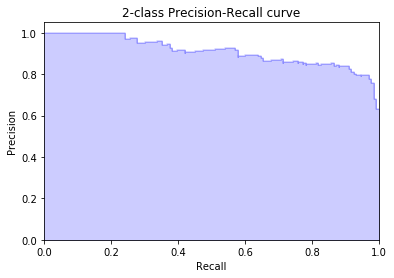

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, mean_squared_error
from sklearn.utils.fixes import signature

y_score = svclassifier.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
plt.title('2-class Precision-Recall curve')

In [29]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.93      0.78      0.85       146
        1.0       0.79      0.93      0.86       133

avg / total       0.86      0.85      0.85       279



In [30]:
y_test

,0
903,1.0
515,1.0
426,0.0
13,1.0
146,0.0
63,1.0
692,0.0
480,0.0
232,0.0
109,1.0


In [31]:
y_pred

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

In [32]:
mse = mean_squared_error(y_test,y_pred)
print('Test MSE: %.2f' % (mse))

Test MSE: 0.15
